# 🚀 **6th Semester - Software Engineering Lab**

---

### 📝 **Made By:-**  
- **Student Name:** Ramesh Chandra Soren  
- **Enrollment Number:** 2022CSB086  

---

### 🌈 **Project Inspiration**  
*Code is poetry*  
A beautiful philosophy that captures the art and creativity of software development.  

---


# 1. Tower of Hanoi

+------------+-------------------+-------------------+
| Input Size | Running Time (s)  | Number of Moves   |
+------------+-------------------+-------------------+
|     1      |     0.000001      |         1         |
|     2      |     0.000002      |         3         |
|     3      |     0.000002      |         7         |
|     4      |     0.000029      |        15         |
|     5      |     0.000009      |        31         |
|     6      |     0.000019      |        63         |
|     7      |     0.000028      |        127        |
|     8      |     0.000046      |        255        |
|     9      |     0.000091      |        511        |
|     10     |     0.000166      |       1023        |
|     11     |     0.000333      |       2047        |
|     12     |     0.000680      |       4095        |
|     13     |     0.002285      |       8191        |
|     14     |     0.005455      |       16383       |
+------------+-------------------+-------------------+


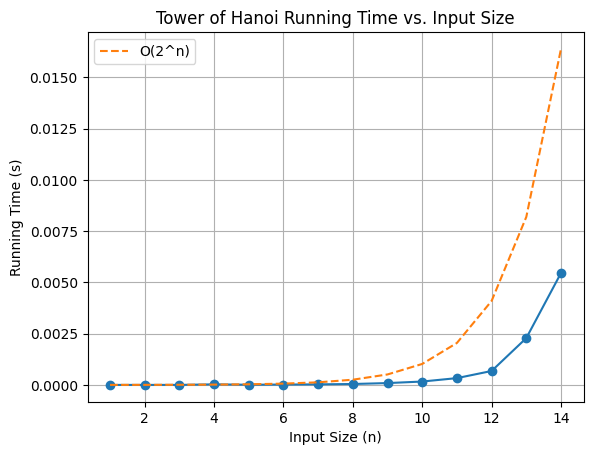


Theoretical Time Complexity Analysis:
The plot clearly shows an exponential growth in running time as the input size increases.
This aligns with the theoretical time complexity of the Tower of Hanoi algorithm, which is O(2^n).

Best, Average, and Worst-Case Analysis:
For the Tower of Hanoi, the best, average, and worst-case time complexities are all the same: O(2^n).
There's no way to solve it with fewer moves regardless of the initial configuration.


In [ ]:
import time
import matplotlib.pyplot as plt

def tower_of_hanoi(n, source, destination, auxiliary):
    """
    Solves the Tower of Hanoi puzzle.

    Args:
        n: The number of disks.
        source: The source peg.
        destination: The destination peg.
        auxiliary: The auxiliary peg.
    """
    if n == 1:
        #print(f"Move disk 1 from {source} to {destination}")  # Optional: Print moves
        return 1  # Count moves for time complexity analysis
    else:
        moves = tower_of_hanoi(n-1, source, auxiliary, destination)
        #print(f"Move disk {n} from {source} to {destination}")  # Optional: Print moves
        moves += 1  # Count the move
        moves += tower_of_hanoi(n-1, auxiliary, destination, source)
        return moves


# Generate tabular data and timing information
input_sizes = range(1, 15)  # Vary input size (number of disks)
running_times = []
moves_counts = []


for n in input_sizes:
    start_time = time.time()
    moves = tower_of_hanoi(n, 'A', 'C', 'B')
    end_time = time.time()
    running_times.append(end_time - start_time)
    moves_counts.append(moves)



# Generate tabular data and timing information
print("+------------+-------------------+-------------------+")
print("| Input Size | Running Time (s)  | Number of Moves   |")
print("+------------+-------------------+-------------------+")

for i in range(len(input_sizes)):
    print(f"| {input_sizes[i]:^10} | {running_times[i]:^17.6f} | {moves_counts[i]:^17} |")

print("+------------+-------------------+-------------------+")



# Plotting the graph
plt.plot(input_sizes, running_times, marker='o')
plt.xlabel("Input Size (n)")
plt.ylabel("Running Time (s)")
plt.title("Tower of Hanoi Running Time vs. Input Size")
plt.grid(True)




# Theoretical Time Complexity Justification
plt.plot(input_sizes, [2**n / 10**6 for n in input_sizes], label="O(2^n)", linestyle='--') #Scaled down to fit. The important part is the shape of the curve.
plt.legend()
plt.show()


print("\nTheoretical Time Complexity Analysis:")
print("The plot clearly shows an exponential growth in running time as the input size increases.")
print("This aligns with the theoretical time complexity of the Tower of Hanoi algorithm, which is O(2^n).")


print("\nBest, Average, and Worst-Case Analysis:")
print("For the Tower of Hanoi, the best, average, and worst-case time complexities are all the same: O(2^n).")
print("There's no way to solve it with fewer moves regardless of the initial configuration.")

# 2. Dijkstra's algorithm

+----------------+-------------------+
| Number of Nodes | Running Time (s) |
+----------------+-------------------+
|       10       |     0.000025      |
|       20       |     0.000046      |
|       30       |     0.000107      |
|       40       |     0.000123      |
|       50       |     0.000175      |
|       60       |     0.000237      |
|       70       |     0.000297      |
|       80       |     0.000380      |
|       90       |     0.000470      |
|      100       |     0.000558      |
|      110       |     0.000673      |
|      120       |     0.000761      |
|      130       |     0.000855      |
|      140       |     0.000974      |
|      150       |     0.001076      |
|      160       |     0.001225      |
|      170       |     0.001373      |
|      180       |     0.001598      |
|      190       |     0.001700      |
|      200       |     0.001797      |
+----------------+-------------------+


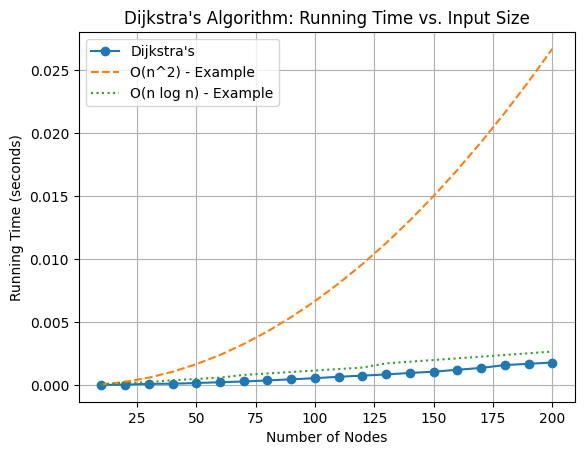


Time Complexity Discussion:
Dijkstra's algorithm, when implemented with a binary heap priority queue (as done here), has a time complexity of O(E log V),
where E is the number of edges and V is the number of vertices (nodes).
In a dense graph where E is close to V^2, the complexity approaches O(V^2 log V).
In a sparse graph where E is closer to V, the complexity approaches O(V log V).
The generated random graphs here likely fall somewhere in between, so the observed running time will be influenced by the density.
The plot allows you to compare the observed performance against theoretical complexities (O(n^2), O(n log n) are shown as examples,
you might need to adjust the constants for a better visual comparison depending on graph density and hardware). 

Best, Average, and Worst-Case:
The time complexity of Dijkstra's is the same for best, average, and worst cases when using a binary heap.


In [ ]:
import heapq
import time
import matplotlib.pyplot as plt

def dijkstra(graph, start):
    """
    Dijkstra's algorithm to find the shortest paths from a starting node.

    Args:
        graph: A dictionary representing the graph where keys are nodes
               and values are dictionaries of neighbors with associated edge weights.
        start: The starting node.

    Returns:
        A dictionary of shortest distances from the start node to all reachable nodes.
    """

    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    priority_queue = [(0, start)]

    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)

        if current_distance > distances[current_node]:
            continue

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))

    return distances


import networkx as nx
import random

def generate_random_graph(num_nodes, edge_probability=0.3, max_weight=10):
    """Generates a random connected graph."""

    G = nx.Graph()  # Create the graph directly
    G.add_nodes_from(range(num_nodes)) #Add all the nodes first


    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            if random.random() < edge_probability:
                weight = random.randint(1, max_weight)
                G.add_edge(i, j, weight=weight) #Add edges with weights directly to graph object



    # Ensure connectivity (more efficient approach)
    while not nx.is_connected(G): #Check if the graph is connected. If not, add more edges until it is connected
        u = random.choice(list(G.nodes))
        disconnected_nodes = set(G.nodes) - set(nx.node_connected_component(G,u)) # Find all the nodes that are not in the currently biggest connected component. Since we add edges until the whole graph is one connected component, these are also all the nodes that are not in the same component as u
        v = random.choice(list(disconnected_nodes)) #Choose a node from a different connected component
        weight = random.randint(1, max_weight)
        G.add_edge(u, v, weight=weight)


    # Convert back to adjacency dictionary for Dijkstra's algorithm
    graph = {node: {} for node in G.nodes} #Create a dictionary to store the adjanceny lists of the form graph[u] = {v_1:w_1, v_2:w_2, ...}
    for u, v, weight in G.edges(data=True):
        graph[u][v] = weight['weight']
        graph[v][u] = weight['weight']  # Ensure it's undirected in the dictionary

    return graph



# Time Complexity Analysis

input_sizes = range(10, 201, 10) # Test for graphs from 10 to 200 nodes
running_times = []

for num_nodes in input_sizes:

    graph = generate_random_graph(num_nodes)

    start_time = time.time()
    dijkstra(graph, 0)  # Run Dijkstra's from node 0
    end_time = time.time()
    running_times.append(end_time - start_time)


# Print table header
print("+----------------+-------------------+")
print("| Number of Nodes | Running Time (s) |")
print("+----------------+-------------------+")

# Print table rows
for i, num_nodes in enumerate(input_sizes):
    print(f"| {num_nodes:^14} | {running_times[i]:^17.6f} |")

# Print table footer
print("+----------------+-------------------+")


# Plotting the Running Times
plt.plot(input_sizes, running_times, marker='o', label="Dijkstra's")
plt.xlabel("Number of Nodes")
plt.ylabel("Running Time (seconds)")
plt.title("Dijkstra's Algorithm: Running Time vs. Input Size")
plt.grid(True)



# Theoretical Comparison Lines (Adjust constants as needed to visualize)
plt.plot(input_sizes, [(n**2) / 1_500_000 for n in input_sizes], linestyle='--', label="O(n^2) - Example") # Scaled down O(n^2) for visualization.
plt.plot(input_sizes, [(n * (n.bit_length())) / 600_000 for n in input_sizes], linestyle=':', label="O(n log n) - Example") # Example O(n log n)

plt.legend()
plt.show()



# Time Complexity Discussion
print("\nTime Complexity Discussion:")
print("Dijkstra's algorithm, when implemented with a binary heap priority queue (as done here), has a time complexity of O(E log V),")
print("where E is the number of edges and V is the number of vertices (nodes).")
print("In a dense graph where E is close to V^2, the complexity approaches O(V^2 log V).")
print("In a sparse graph where E is closer to V, the complexity approaches O(V log V).")
print("The generated random graphs here likely fall somewhere in between, so the observed running time will be influenced by the density.")
print("The plot allows you to compare the observed performance against theoretical complexities (O(n^2), O(n log n) are shown as examples,")
print("you might need to adjust the constants for a better visual comparison depending on graph density and hardware). ")



print("\nBest, Average, and Worst-Case:")
print("The time complexity of Dijkstra's is the same for best, average, and worst cases when using a binary heap.")

# 3. Kruskal's algorithm

Number of Nodes | Running Time (seconds)
----------------------------------------
             10 | 0.000055
             20 | 0.000188
             30 | 0.000322
             40 | 0.000563
             50 | 0.000943
             60 | 0.001382
             70 | 0.001849
             80 | 0.002587
             90 | 0.003061
            100 | 0.003993
            110 | 0.004518
            120 | 0.005454
            130 | 0.006490
            140 | 0.008289
            150 | 0.009609
            160 | 0.010742
            170 | 0.012589
            180 | 0.013618
            190 | 0.015448
            200 | 0.016787


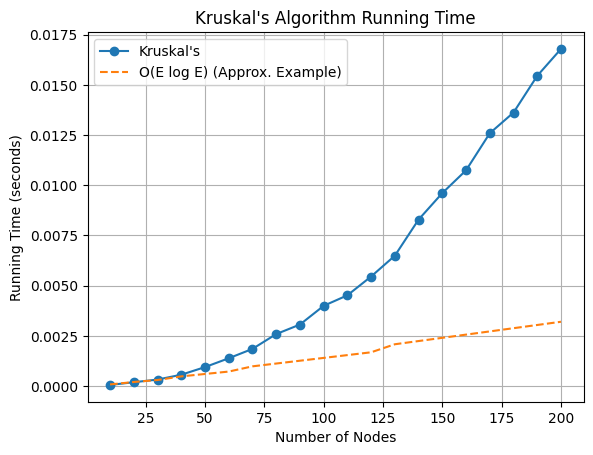


Time Complexity:
Kruskal's algorithm has a time complexity dominated by the edge sorting step, which is O(E log E), where E is the number of edges.
In a dense graph where E approaches V^2 (V being the number of nodes), the complexity is close to O(V^2 log V^2) = O(2V^2 log V).
In a sparse graph where E is closer to V, the complexity becomes approximately O(V log V).
The plot provides an empirical comparison, and you can adjust the constant factor in the example O(E log E) line to visualize how the practical running time relates to the theoretical bound in different graph density scenarios.

Best, Average, Worst-Case:
The complexity is generally considered the same for all cases due to the dominance of the sorting step.


In [ ]:
import time
import random
import matplotlib.pyplot as plt
import networkx as nx  # For graph generation and checking connectivity

class DisjointSet:
    def __init__(self, n):
        self.parent = list(range(n))
        self.rank = [0] * n

    def find(self, i):
        if self.parent[i] == i:
            return i
        self.parent[i] = self.find(self.parent[i]) #Path compression
        return self.parent[i]

    def union(self, i, j):
        root_i = self.find(i)
        root_j = self.find(j)
        if root_i != root_j:
            if self.rank[root_i] < self.rank[root_j]:
                self.parent[root_i] = root_j
            elif self.rank[root_i] > self.rank[root_j]:
                self.parent[root_j] = root_i
            else:
                self.parent[root_j] = root_i
                self.rank[root_i] += 1
            return True #Return True if we formed a union (i and j were not part of the same set)
        return False #Return False if i and j were already in the same set



def kruskal(graph):
    """
    Kruskal's algorithm to find the minimum spanning tree of a graph.

    Args:
        graph: A dictionary representing the graph where keys are nodes
               and values are dictionaries of neighbors with associated edge weights.

    Returns:
        A list of tuples representing the edges in the MST and their weights,
        or None if the graph is not connected.

        [(u,v,w), ...]
    """
    num_nodes = len(graph)
    edges = []
    for u in graph:
        for v, weight in graph[u].items():
            edges.append((u, v, weight))

    edges.sort(key=lambda edge: edge[2]) #Sort the edges by edge weight

    mst = []
    disjoint_set = DisjointSet(num_nodes)
    for u, v, weight in edges:
        if disjoint_set.union(u, v):
            mst.append((u, v, weight))

    return mst



def generate_random_graph(num_nodes, edge_probability=0.3, max_weight=10):
    """Generates a random connected graph."""
    G = nx.Graph()  # Create the graph object directly
    G.add_nodes_from(range(num_nodes))
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            if random.random() < edge_probability:
                weight = random.randint(1, max_weight)
                G.add_edge(i, j, weight=weight)
    while not nx.is_connected(G):
        u = random.choice(list(G.nodes))
        disconnected_nodes = set(G.nodes) - set(nx.node_connected_component(G, u))
        v = random.choice(list(disconnected_nodes))
        weight = random.randint(1, max_weight)
        G.add_edge(u, v, weight=weight)

    graph = {node: {} for node in G.nodes}
    for u, v, weight_data in G.edges(data=True):
        graph[u][v] = weight_data['weight']
        graph[v][u] = weight_data['weight'] #Make it undirected
    return graph



# Time Complexity Analysis

input_sizes = range(10, 201, 10)  # Test with varying number of nodes
running_times = []


for num_nodes in input_sizes:
    graph = generate_random_graph(num_nodes) #Generate a graph for each number of nodes
    start_time = time.time()
    kruskal(graph)
    end_time = time.time()
    running_times.append(end_time - start_time)





# Tabular Data of Running Times
print("Number of Nodes | Running Time (seconds)")
print("----------------------------------------")
for i, n in enumerate(input_sizes):
    print(f"{n:15} | {running_times[i]:.6f}")



# Plot the Running Times
plt.plot(input_sizes, running_times, marker='o', label="Kruskal's")
plt.xlabel("Number of Nodes")
plt.ylabel("Running Time (seconds)")
plt.title("Kruskal's Algorithm Running Time")

# Theoretical Complexity: O(E log E)  where E is the number of edges
# For comparison (adjust the constant as needed based on density/hardware)
plt.plot(input_sizes, [n*n.bit_length() / 500_000 for n in input_sizes ], linestyle='--', label="O(E log E) (Approx. Example)")  # Example (adjust constant)
plt.grid(True)
plt.legend()
plt.show()


# Time Complexity Discussion
print("\nTime Complexity:")
print("Kruskal's algorithm has a time complexity dominated by the edge sorting step, which is O(E log E), where E is the number of edges.")
print("In a dense graph where E approaches V^2 (V being the number of nodes), the complexity is close to O(V^2 log V^2) = O(2V^2 log V).")
print("In a sparse graph where E is closer to V, the complexity becomes approximately O(V log V).")
print("The plot provides an empirical comparison, and you can adjust the constant factor in the example O(E log E) line to visualize how the practical running time relates to the theoretical bound in different graph density scenarios.")

print("\nBest, Average, Worst-Case:")
print("The complexity is generally considered the same for all cases due to the dominance of the sorting step.")

# 4. Prim’s algorithm

Number of Nodes | Running Time (seconds)
----------------------------------------
             10 | 0.000022
             20 | 0.000050
             30 | 0.000135
             40 | 0.000197
             50 | 0.000343
             60 | 0.000509
             70 | 0.000710
             80 | 0.000923
             90 | 0.001566
            100 | 0.001644
            110 | 0.001749
            120 | 0.002271
            130 | 0.002840
            140 | 0.003126
            150 | 0.003778
            160 | 0.004186
            170 | 0.004833
            180 | 0.005316
            190 | 0.006041
            200 | 0.007932


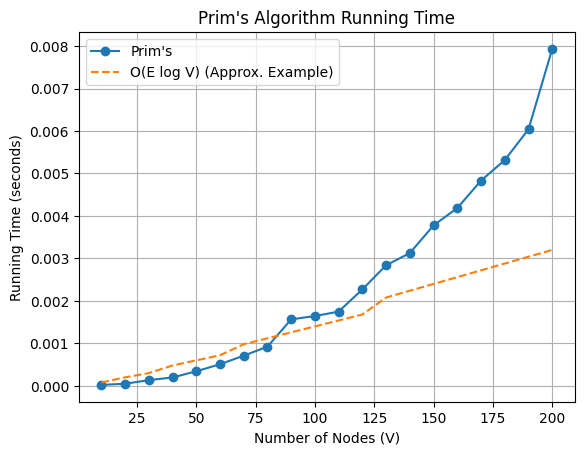


Time Complexity:
Prim's algorithm, when implemented with a binary heap priority queue, has a time complexity of O(E log V), where E is the number of edges and V is the number of vertices.
In dense graphs (E close to V^2), the complexity approaches O(V^2 log V).
In sparse graphs (E close to V), it's closer to O(V log V).
The plotted O(E log V) line is an approximation; adjust the constant for more accurate visual comparison based on graph density and hardware.

Best, Average, Worst-Case:
Using a binary heap, Prim's has the same complexity for all cases.


In [ ]:
import heapq
import time
import random
import matplotlib.pyplot as plt
import networkx as nx


def prim(graph, start_node=0):
    """
    Prim's algorithm to find the minimum spanning tree of a graph.

    Args:
        graph: A dictionary representing the graph where keys are nodes
               and values are dictionaries of neighbors with associated edge weights.
        start_node: The starting node for the algorithm.

    Returns:
        A list of tuples representing the edges in the MST and their weights,
        or None if the graph is not connected.
    """
    num_nodes = len(graph)
    mst = []
    visited = [False] * num_nodes
    priority_queue = [(0, start_node, -1)]  # (weight, node, parent)

    while priority_queue:
        weight, current_node, parent_node = heapq.heappop(priority_queue)

        if visited[current_node]:
            continue

        visited[current_node] = True
        if parent_node != -1:  # Add edge to MST (except for the first node)
            mst.append((parent_node, current_node, weight))

        for neighbor, edge_weight in graph[current_node].items():
            if not visited[neighbor]:
                heapq.heappush(priority_queue, (edge_weight, neighbor, current_node))

    if len(mst) < num_nodes -1: #Return None if the input graph is not connected and thus a MST does not exist
        return None

    return mst





def generate_random_graph(num_nodes, edge_probability=0.3, max_weight=10):
    """Generates a random connected graph."""

    G = nx.Graph()
    G.add_nodes_from(range(num_nodes))
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            if random.random() < edge_probability:
                weight = random.randint(1, max_weight)
                G.add_edge(i, j, weight=weight)

    while not nx.is_connected(G):
        u = random.choice(list(G.nodes))
        disconnected_nodes = set(G.nodes) - set(nx.node_connected_component(G, u))
        v = random.choice(list(disconnected_nodes))
        weight = random.randint(1, max_weight)
        G.add_edge(u, v, weight=weight)

    # Convert to dictionary format for Prim's algorithm
    graph = {node: {} for node in G.nodes}
    for u, v, weight_data in G.edges(data=True):  # Use data=True to get edge attributes
        graph[u][v] = weight_data['weight']
        graph[v][u] = weight_data['weight']
    return graph







# Time Complexity Analysis
input_sizes = range(10, 201, 10)
running_times = []

for num_nodes in input_sizes:
    graph = generate_random_graph(num_nodes)
    start_time = time.time()
    prim(graph)
    end_time = time.time()
    running_times.append(end_time - start_time)


# Tabular Data
print("Number of Nodes | Running Time (seconds)")
print("----------------------------------------")
for i, n in enumerate(input_sizes):
    print(f"{n:15} | {running_times[i]:.6f}")


# Plotting the results
plt.plot(input_sizes, running_times, marker='o', label="Prim's")
plt.xlabel("Number of Nodes (V)")
plt.ylabel("Running Time (seconds)")
plt.title("Prim's Algorithm Running Time")

# Theoretical Complexity: O(E log V) using binary heap
plt.plot(input_sizes, [n*n.bit_length() /500000 for n in input_sizes], linestyle='--', label="O(E log V) (Approx. Example)")

plt.grid(True)
plt.legend()
plt.show()



# Time Complexity Discussion (more detailed)
print("\nTime Complexity:")
print("Prim's algorithm, when implemented with a binary heap priority queue, has a time complexity of O(E log V), where E is the number of edges and V is the number of vertices.")
print("In dense graphs (E close to V^2), the complexity approaches O(V^2 log V).")
print("In sparse graphs (E close to V), it's closer to O(V log V).")
print("The plotted O(E log V) line is an approximation; adjust the constant for more accurate visual comparison based on graph density and hardware.")


print("\nBest, Average, Worst-Case:")
print("Using a binary heap, Prim's has the same complexity for all cases.")

# 5. Knapsack problem algorithm

Number of Items | Running Time (seconds)
----------------------------------------
              5 | 0.000271
             10 | 0.000696
             15 | 0.001134
             20 | 0.001842
             25 | 0.001124
             30 | 0.001268
             35 | 0.002824
             40 | 0.001935
             45 | 0.002028
             50 | 0.002819


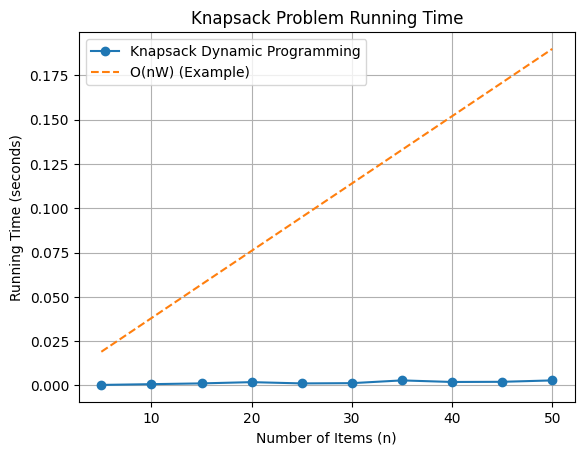


Time Complexity:
The dynamic programming approach to the knapsack problem has a time complexity of O(nW), where n is the number of items and W is the knapsack capacity.
The plot shows the empirical running time against the number of items. The O(nW) line is included for comparison (adjust constant as needed since W also varies slightly).

Best, Average, and Worst-Case:
The dynamic programming solution has the same time complexity O(nW) for all cases (best, average, worst) as it always fills out the entire DP table.


In [ ]:
import time
import random
import matplotlib.pyplot as plt

def knapsack_dynamic_programming(weights, values, capacity):
    """
    Solves the 0/1 knapsack problem using dynamic programming.

    Args:
        weights: A list of item weights.
        values: A list of item values.
        capacity: The knapsack's weight capacity.

    Returns:
        A tuple containing the maximum total value and the selected items.
    """
    n = len(weights)
    dp = [[0 for _ in range(capacity + 1)] for _ in range(n + 1)]

    for i in range(1, n + 1):
        for w in range(capacity + 1):
            if weights[i - 1] <= w:
                dp[i][w] = max(values[i - 1] + dp[i - 1][w - weights[i - 1]], dp[i - 1][w])
            else:
                dp[i][w] = dp[i - 1][w]

    max_value = dp[n][capacity]
    selected_items = []
    w = capacity
    for i in range(n, 0, -1):
        if dp[i][w] != dp[i - 1][w]:
            selected_items.append(i - 1)
            w -= weights[i - 1]

    return max_value, selected_items



# Time Complexity Analysis

input_sizes = range(5, 51, 5)  # Vary the number of items
running_times = []

for n in input_sizes:
    weights = [random.randint(1, 50) for _ in range(n)]
    values = [random.randint(1, 100) for _ in range(n)]
    capacity = random.randint(50, 100)  # Keep capacity within a reasonable range

    start_time = time.time()
    knapsack_dynamic_programming(weights, values, capacity)
    end_time = time.time()
    running_times.append(end_time - start_time)



# Tabular data
print("Number of Items | Running Time (seconds)")
print("----------------------------------------")
for i, size in enumerate(input_sizes):
    print(f"{size:15} | {running_times[i]:.6f}")



# Plotting the results
plt.plot(input_sizes, running_times, marker='o', label="Knapsack Dynamic Programming")
plt.xlabel("Number of Items (n)")
plt.ylabel("Running Time (seconds)")
plt.title("Knapsack Problem Running Time")


# Plot theoretical time complexity O(nW)  (adjust constant for better fit)
plt.plot(input_sizes, [n*capacity / 20_000 for n in input_sizes], linestyle='--', label="O(nW) (Example)")


plt.grid(True)
plt.legend()
plt.show()



print("\nTime Complexity:")
print("The dynamic programming approach to the knapsack problem has a time complexity of O(nW), where n is the number of items and W is the knapsack capacity.")
print("The plot shows the empirical running time against the number of items. The O(nW) line is included for comparison (adjust constant as needed since W also varies slightly).")


print("\nBest, Average, and Worst-Case:")
print("The dynamic programming solution has the same time complexity O(nW) for all cases (best, average, worst) as it always fills out the entire DP table.")

# 6. Floyd-Warshall algorithm

Number of Nodes (V) | Running Time (s)
------------------------------------
                  5 | 0.000696
                 10 | 0.002939
                 15 | 0.004673
                 20 | 0.010389
                 25 | 0.022523
                 30 | 0.034821
                 35 | 0.056466
                 40 | 0.080909
                 45 | 0.119307
                 50 | 0.166995


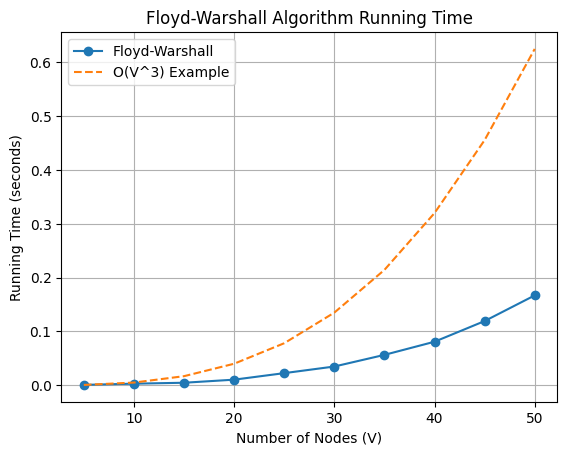


Time Complexity:
The Floyd-Warshall algorithm has a time complexity of O(V^3), where V is the number of vertices (nodes) in the graph.
The plot shows how the running time increases with the number of nodes, and the O(V^3) curve is included for comparison. The scaling constant for O(V^3) has been adjusted for better visualization.

Best, Average, and Worst Case:
The Floyd-Warshall algorithm has the same time complexity, O(V^3), for the best, average, and worst cases, as it always iterates through all possible intermediate nodes regardless of the graph's structure.


In [ ]:
import time
import random
import matplotlib.pyplot as plt
import numpy as np  # Using NumPy for efficient array operations


def floyd_warshall(graph):
    """
    Floyd-Warshall algorithm to find all-pairs shortest paths.

    Args:
        graph: A 2D list representing the adjacency matrix of the graph,
               where graph[i][j] is the weight of the edge between nodes i and j.
               Infinity (float('inf')) represents no direct edge.

    Returns:
        A 2D list representing the shortest path distances between all pairs of nodes.
    """
    n = len(graph)
    dist = np.copy(graph) #Create a copy of the graph to store distances. np.copy makes a new copy of the list so that the original graph is not changed.


    for k in range(n):
        for i in range(n):
            for j in range(n):
                dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])
    return dist




# Time Complexity Analysis
input_sizes = range(5, 51, 5) # Test graph sizes from 5 nodes to 50 nodes in steps of 5
running_times = []



for n in input_sizes:
    # Create a random graph represented by a 2D adjacency matrix
    graph = np.full((n,n), np.inf) #Initialize all entries to infinity. np.full creates an n x n array and fills it with the given value, in this case infinity.
    for i in range(n):
        for j in range(n):
            if i != j and random.random() < 0.4: # Add some edges with 40% probability. if i!=j because we don't want self loops
                graph[i][j] = random.randint(1,100) # If edge exists, give random weight
        graph[i][i] = 0 # Distance to itself is always 0


    start_time = time.time()
    floyd_warshall(graph)
    end_time = time.time()
    running_times.append(end_time - start_time)





# Tabular Data
print("Number of Nodes (V) | Running Time (s)")
print("------------------------------------")
for i, n in enumerate(input_sizes):
    print(f"{n:19} | {running_times[i]:.6f}")




# Plotting running times
plt.plot(input_sizes, running_times, marker='o', label="Floyd-Warshall")
plt.xlabel("Number of Nodes (V)")
plt.ylabel("Running Time (seconds)")
plt.title("Floyd-Warshall Algorithm Running Time")

#Plot n^3 curve for comparison, adjust scaling factor if needed (e.g., / 100000, / 1000000)
plt.plot(input_sizes, [n**3 / 200_000 for n in input_sizes], linestyle="--", label="O(V^3) Example")


plt.grid(True)
plt.legend()
plt.show()




# Time Complexity Discussion
print("\nTime Complexity:")
print("The Floyd-Warshall algorithm has a time complexity of O(V^3), where V is the number of vertices (nodes) in the graph.")
print("The plot shows how the running time increases with the number of nodes, and the O(V^3) curve is included for comparison. The scaling constant for O(V^3) has been adjusted for better visualization.")  # Explain the scaling

print("\nBest, Average, and Worst Case:")
print("The Floyd-Warshall algorithm has the same time complexity, O(V^3), for the best, average, and worst cases, as it always iterates through all possible intermediate nodes regardless of the graph's structure.")

# 7. Merge sort algorithm

Input Size (n) | Running Time (seconds)
---------------------------------------
          1000 | 0.003965
          6000 | 0.025897
         11000 | 0.050018
         16000 | 0.074069
         21000 | 0.099700
         26000 | 0.128447
         31000 | 0.180119
         36000 | 0.195839
         41000 | 0.216259
         46000 | 0.239043
         51000 | 0.291004
         56000 | 0.300831
         61000 | 0.337413
         66000 | 0.382177
         71000 | 0.388766
         76000 | 0.443583
         81000 | 0.449503
         86000 | 0.506959
         91000 | 0.597912
         96000 | 1.032504


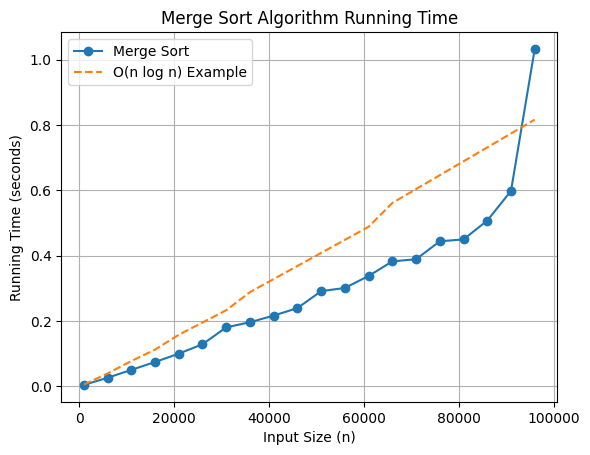


Time Complexity:
Merge sort has a time complexity of O(n log n) in all cases (best, average, and worst).
The plot demonstrates that the practical running time closely follows the n log n curve.
The scaling constant for the example O(n log n) line is adjusted for better visualization, as the real constant factor depends on hardware and implementation details.

Best, Average, and Worst Case:
Merge Sort has a time complexity of O(n log n) for all cases.


In [ ]:
import time
import random
import matplotlib.pyplot as plt

def merge_sort(arr):
    """
    Sorts a list using the merge sort algorithm.

    Args:
      arr: The list to be sorted.

    Returns:
      The sorted list.
    """
    if len(arr) <= 1:
        return arr

    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]

    left = merge_sort(left)
    right = merge_sort(right)

    return merge(left, right)

def merge(left, right):
    """Merges two sorted lists into a single sorted list."""
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1

    result.extend(left[i:])
    result.extend(right[j:])
    return result


# Time Complexity Analysis

input_sizes = range(1000, 100001, 5000)  # Varying input sizes
running_times = []

for n in input_sizes:
    arr = [random.randint(1, 10000) for _ in range(n)]  # Generate a random list of size n

    start_time = time.time()
    merge_sort(arr)
    end_time = time.time()

    running_times.append(end_time - start_time)



# Tabular Data
print("Input Size (n) | Running Time (seconds)")
print("---------------------------------------")
for i, size in enumerate(input_sizes):
    print(f"{size:14} | {running_times[i]:.6f}")




# Plotting running times
plt.plot(input_sizes, running_times, marker='o', label="Merge Sort")
plt.xlabel("Input Size (n)")
plt.ylabel("Running Time (seconds)")
plt.title("Merge Sort Algorithm Running Time")



# Comparing with O(n log n)
plt.plot(input_sizes, [n * (n.bit_length())/2_000_000 for n in input_sizes], linestyle='--', label="O(n log n) Example")
plt.grid(True)
plt.legend()
plt.show()



# Time Complexity Discussion
print("\nTime Complexity:")
print("Merge sort has a time complexity of O(n log n) in all cases (best, average, and worst).")
print("The plot demonstrates that the practical running time closely follows the n log n curve.")
print("The scaling constant for the example O(n log n) line is adjusted for better visualization, as the real constant factor depends on hardware and implementation details.")

print("\nBest, Average, and Worst Case:")
print("Merge Sort has a time complexity of O(n log n) for all cases.")  # Emphasize the consistency

# 8. Quick sort algorithm


Quicksort - Best Case:
 Input Size Running Time (seconds)
         10               0.000033
        100               0.000289
        500               0.001619
       1000               0.003766
       2000               0.005605
       3000               0.006672
       4000               0.008096
       5000               0.013302

Quicksort - Average Case:
 Input Size Running Time (seconds)
         10               0.000016
        100               0.000190
        500               0.001245
       1000               0.002461
       2000               0.005519
       3000               0.008179
       4000               0.011233
       5000               0.014834

Quicksort - Worst Case:
 Input Size Running Time (seconds)
         10               0.000015
        100               0.000151
        500               0.000813
       1000               0.001741
       2000               0.003740
       3000               0.006464
       4000               0.008040
       5000   

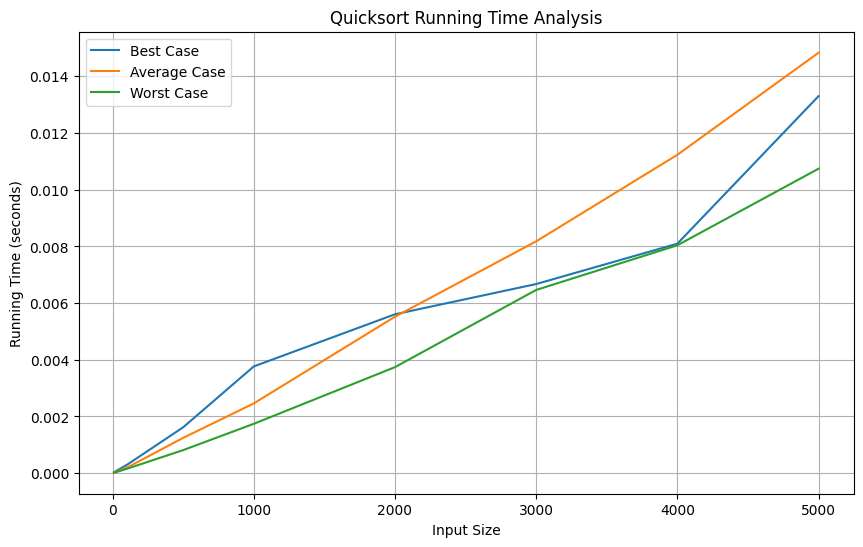

In [ ]:
import time
import random
import matplotlib.pyplot as plt
import pandas as pd  # Import pandas for better table formatting

def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)

def generate_input(size, case):
    if case == "best":
        return sorted(list(range(size)))  # Already sorted
    elif case == "average":
        return random.sample(range(size), size)  # Randomly shuffled
    elif case == "worst":
        return list(range(size, 0, -1)) # Reverse sorted
    else:
        raise ValueError("Invalid case type. Choose from 'best', 'average', or 'worst'.")

cases = ["best", "average", "worst"]
sizes = [10, 100, 500, 1000, 2000, 3000, 4000, 5000]  # Vary input sizes as needed
results = {case: [] for case in cases}

for case in cases:
    for size in sizes:
        input_arr = generate_input(size, case)
        start_time = time.time()
        quicksort(input_arr)  # Call the sorting function
        end_time = time.time()
        running_time = end_time - start_time
        results[case].append((size, running_time))

# Tabular Data Output using Pandas
for case in cases:
    print(f"\nQuicksort - {case.capitalize()} Case:")
    df = pd.DataFrame(results[case], columns=["Input Size", "Running Time (seconds)"])
    df["Running Time (seconds)"] = df["Running Time (seconds)"].apply(lambda x: f"{x:.6f}")
    print(df.to_string(index=False))  # Use to_string() for a cleaner table

# Plotting
plt.figure(figsize=(10, 6))
for case in cases:
    x = [result[0] for result in results[case]]  # Input sizes
    y = [result[1] for result in results[case]]  # Running times
    plt.plot(x, y, label=f"{case.capitalize()} Case")

plt.xlabel("Input Size")
plt.ylabel("Running Time (seconds)")
plt.title("Quicksort Running Time Analysis")
plt.legend()
plt.grid(True)
plt.show()

N = 1, Runtime = 0.000010 seconds
Solution does not exist
N = 2, Runtime = 0.000020 seconds
Solution does not exist
N = 3, Runtime = 0.002084 seconds
N = 4, Runtime = 0.000069 seconds
N = 5, Runtime = 0.000034 seconds
N = 6, Runtime = 0.000324 seconds
N = 7, Runtime = 0.000109 seconds
N = 8, Runtime = 0.001639 seconds
N = 9, Runtime = 0.000644 seconds
N = 10, Runtime = 0.001822 seconds
N = 11, Runtime = 0.001002 seconds
N = 12, Runtime = 0.008412 seconds
______________________________________
     N  Runtime (s)
0    1     0.000010
1    2     0.000020
2    3     0.002084
3    4     0.000069
4    5     0.000034
5    6     0.000324
6    7     0.000109
7    8     0.001639
8    9     0.000644
9   10     0.001822
10  11     0.001002
11  12     0.008412


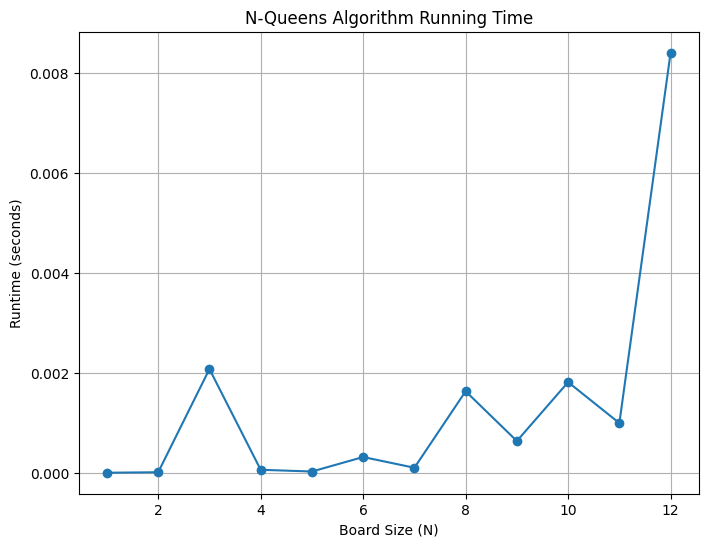

In [ ]:
import time
import matplotlib.pyplot as plt
import pandas as pd

def is_safe(board, row, col, N):
    """
    Checks if it's safe to place a queen at board[row][col].
    """

    # Check same column
    for i in range(row):
        if board[i][col] == 1:
            return False

    # Check upper left diagonal
    for i, j in zip(range(row - 1, -1, -1), range(col - 1, -1, -1)):
        if board[i][j] == 1:
            return False

    # Check upper right diagonal
    for i, j in zip(range(row - 1, -1, -1), range(col + 1, N)):
        if board[i][j] == 1:
            return False

    return True

def solve_nqueens_util(board, row, N):
    """
    Recursive utility function to solve N-Queens using backtracking.
    """
    if row == N:
        return True  # All queens are placed successfully

    for col in range(N):
        if is_safe(board, row, col, N):
            board[row][col] = 1  # Place queen

            if solve_nqueens_util(board, row + 1, N):
                return True  # Recur for the next row

            board[row][col] = 0  # Backtrack: remove queen if placement didn't lead to a solution

    return False  # No solution found for this row

def solve_nqueens(N):
    """
    Solves the N-Queens problem for a given board size N.
    """
    board = [[0] * N for _ in range(N)]  # Initialize empty board

    start_time = time.time()
    if solve_nqueens_util(board, 0, N):
        end_time = time.time()
        return end_time - start_time
    else:
        end_time = time.time()
        print("Solution does not exist")
        return end_time - start_time


def generate_runtime_data(max_n):
    """
    Generates tabular data of running time for different board sizes.
    """
    data = {'N': [], 'Runtime (s)': []}
    for n in range(1, max_n + 1):
        runtime = solve_nqueens(n)
        data['N'].append(n)
        data['Runtime (s)'].append(runtime)
        print(f"N = {n}, Runtime = {runtime:.6f} seconds")
    return pd.DataFrame(data)

# Example usage:
max_board_size = 12  # You can change this to collect data for larger boards
runtime_data = generate_runtime_data(max_board_size)
print("______________________________________")

print(runtime_data)

def plot_runtime(data):
    """
    Plots the running time vs. board size.
    """
    plt.figure(figsize=(8, 6))
    plt.plot(data['N'], data['Runtime (s)'], marker='o')
    plt.title('N-Queens Algorithm Running Time')
    plt.xlabel('Board Size (N)')
    plt.ylabel('Runtime (seconds)')
    plt.grid(True)
    plt.show()

# Example usage:
plot_runtime(runtime_data)

# 10. Traveling Salesman Problem algorithm

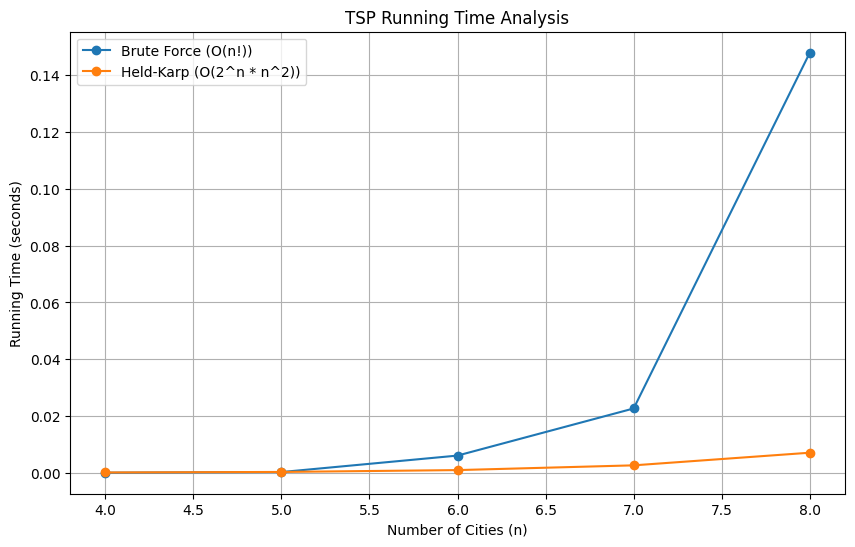

In [ ]:
import itertools
import time
import matplotlib.pyplot as plt

# Distance matrix example
def generate_distance_matrix(n):
    import random
    return [[random.randint(1, 100) if i != j else 0 for j in range(n)] for i in range(n)]

# Brute Force TSP
def tsp_brute_force(dist_matrix):
    n = len(dist_matrix)
    cities = list(range(n))
    min_cost = float("inf")
    for perm in itertools.permutations(cities):
        cost = sum(dist_matrix[perm[i]][perm[i + 1]] for i in range(n - 1))
        cost += dist_matrix[perm[-1]][perm[0]]  # Return to start
        min_cost = min(min_cost, cost)
    return min_cost

# Dynamic Programming (Held-Karp)
def tsp_held_karp(dist_matrix):
    n = len(dist_matrix)

    # Initialize DP table
    # dp[(mask, i)] = (minimum cost to visit all cities in 'mask' ending at city 'i', previous city)
    dp = {}
    for i in range(n):
        dp[(1 << i, i)] = (dist_matrix[0][i] if i != 0 else 0, -1)

    # Fill DP table
    for mask in range(1 << n):
        for u in range(n):
            if not (mask & (1 << u)):
                continue
            # Transition from all v to u
            for v in range(n):
                if v == u or not (mask & (1 << v)):
                    continue
                prev_mask = mask ^ (1 << u)
                if (prev_mask, v) in dp:
                    cost = dp[(prev_mask, v)][0] + dist_matrix[v][u]
                    if (mask, u) not in dp or cost < dp[(mask, u)][0]:
                        dp[(mask, u)] = (cost, v)

    # Find the minimum cost to return to the starting city
    full_mask = (1 << n) - 1
    min_cost = float("inf")
    for u in range(1, n):
        if (full_mask, u) in dp:
            cost = dp[(full_mask, u)][0] + dist_matrix[u][0]
            if cost < min_cost:
                min_cost = cost

    return min_cost

# Measure running time for TSP
def measure_tsp(sizes, approach):
    times = []
    for size in sizes:
        dist_matrix = generate_distance_matrix(size)
        start_time = time.time()
        if approach == "brute_force":
            tsp_brute_force(dist_matrix)
        elif approach == "held_karp":
            tsp_held_karp(dist_matrix)
        end_time = time.time()
        times.append(end_time - start_time)
    return times

# Main function
sizes = [4, 5, 6, 7, 8]  # Adjust sizes as needed
brute_force_times = measure_tsp(sizes, "brute_force")
held_karp_times = measure_tsp(sizes, "held_karp")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sizes, brute_force_times, label="Brute Force (O(n!))", marker="o")
plt.plot(sizes, held_karp_times, label="Held-Karp (O(2^n * n^2))", marker="o")
plt.xlabel("Number of Cities (n)")
plt.ylabel("Running Time (seconds)")
plt.title("TSP Running Time Analysis")
plt.legend()
plt.grid(True)
plt.show()
